# Actor-Critic models:
These models are used to train reinforcement learning agents (actors) on non-differentiable environments.
This is done by using an surrogate (critic) to approximate the environment step function.  
The main advantage of this approach is that it allows to update the agent based on the distance of the environment response to a desired state.

A basic sketch of the algorithm:
1) Infer the next action
- Predict an action with the agent (actor) using the current environment state: $action = agent(desired\; state, state)$
- Perform a environment step with using this action and collect the corresponding next state
2) Upadate the surrogate (critic)
- $Loss\left(next\; state, surrogate\left(action, state\right)\right)$
3) Update the agent (actor) using the surrogate (critic)
- $Loss\left(desired\; state, surrogate\left(agent\left(desired\; state, state\right),state\right)\right)$
- Note that in this last step only the agent (actor) is updated

# Toy-Environment testing
- In this toy-case the objective is to predict the differnce of a inital state (constant) $\in \mathbb{R}^{1x100}$ and a target state (varies)  $\in \mathbb{R}^{1x100}$
- This goal is to be achieved without prior pretraining, soley based on the exploration data gathered using the model

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
# Test training script without W&B logging and saving
%run train_simple_agent_toy.py --savedir None --lr 1e-5 --n_episodes 1 --log_writer 0 --num_hidden 0 --episode_len 1 --log_every 2000 --batch_size 1024

MLP(
  (linear_layers): ModuleList(
    (0): Linear(in_features=200, out_features=100, bias=True)
  )
)


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


In [5]:
# Load a model, which was only trained on exploration. Logging link: https://wandb.ai/aipp/Laser-Agents/runs/2shlw7fh?workspace=user-friedrich_bethke
pt_name = '../toy_example/models/64_0_20000000_2shlw7fh_treasured-flower-137'
agent.agent.load_state_dict(torch.load(pt_name, map_location=device))

<All keys matched successfully>

In [7]:
env.reset()
env.target = targets[0]
print("loss: {}".format(torch.nn.MSELoss()(env.target, agent.inference(1,env))))

env.reset()
env.target = targets[1]
print("loss: {}".format(torch.nn.MSELoss()(env.target, agent.inference(1,env))))

loss: 4.8811141795113144e-09
loss: 4.787339094036724e-07


In [10]:
0.0009, 9e-4

(0.0009, 0.0009)

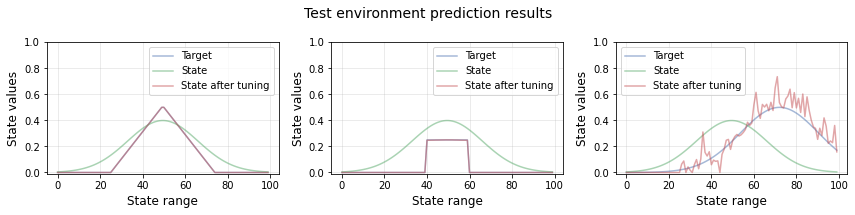

In [8]:
# Infer model on targets (chosen randomly from env targets)

#plt.style.use('dark_background')
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(1,3, figsize=(12,3))

env.reset()
env.target = targets[0]
ax[0].plot(env.target.cpu().detach().numpy(), label='Target', alpha=0.5)
ax[0].plot(env.state.cpu().detach().numpy(), label='State', alpha=0.5)
ax[0].plot(agent.inference(1,env).cpu().detach().numpy(), label='State after tuning', alpha=0.5)
ax[0].set_ylabel("State values", size=12)
ax[0].set_xlabel("State range", size=12)
ax[0].set_ylim(-0.01,1.)
ax[0].grid(alpha=0.3)
ax[0].legend(fontsize=10)

env.reset()
env.target = targets[1]
ax[1].plot(env.target.cpu().detach().numpy(), label='Target', alpha=0.5)
ax[1].plot(env.state.cpu().detach().numpy(), label='State', alpha=0.5)
ax[1].plot(agent.inference(1,env).cpu().detach().numpy(), label='State after tuning', alpha=0.5)
ax[1].set_ylabel("State values", size=12)
ax[1].set_xlabel("State range", size=12)
ax[1].set_ylim(-0.01,1.)
ax[1].grid(alpha=0.3)
ax[1].legend(fontsize=10)

env.reset()
env.target = targets[6]
ax[2].plot(env.target.cpu().detach().numpy(), label='Target', alpha=0.5)
ax[2].plot(env.state.cpu().detach().numpy(), label='State', alpha=0.5)
ax[2].plot(agent.inference(1,env).cpu().detach().numpy(), label='State after tuning', alpha=0.5)
ax[2].set_ylabel("State values", size=12)
ax[2].set_xlabel("State range", size=12)
ax[2].set_ylim(-0.01,1.)
ax[2].grid(alpha=0.3)
ax[2].legend(fontsize=10)

plt.suptitle("Test environment prediction results", size=14)
plt.tight_layout()
#plt.savefig("../../thesis_plots/toy_case_results", dpi=300)
plt.show()